<center>

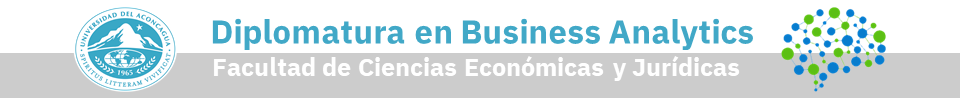

</center>

<center>
<font color="#41a8c7">
<h2><b>
Trabajo Final Módulo 9

</font>
</center>

~~~
Russo Gastón
~~~

**Instrucciones del Trabajo Final**

- Desarrollar los puntos necesarios para generar los modelos de clasificación.
- Puede usar PyCaret, Scikit-learn o ambos
- Puede generar graficos en cualquier instancia del desarrollo
- Al final del colab, generar una breve conclusión
- Al finalizar, generar PDF del Google Colab para subir en plataforma

En virtud del DataFrame propuesto, generar modelos de clasificación para predecir la contratación de depositos a plazo:

- **age:** edad del cliente, valor numérico entero mayor a 18.
- **job:** trabajo del cliente.
- **marital:** estado civil del cliente.
- **education:** educación alcanzada por el cliente.
- **default:** si el cliente posee deudas.
- **balance:** depósito del cliente en euros.
- **housing:** propietario de inmueble o alquila.
- **loan:** si el cliente tiene un préstamo.
- **contact:** último contacto del cliente.
- **day:** día del último contacto del cliente.
- **month:** mes del último contacto el cliente.
- **duration:** duración del último contacto del cliente.
- **campaign:** identificación de la campaña.
- **pdays:** dias posteriores a la campaña.
- **previous:** números de contactos previos a la campaña.
- **poutcome:** resultados de la campaña anterior.
- **y:** si suscribe un depósito a plazo posterior a campaña.

# **Carga de módulos y datos necesarios**

In [ ]:
import pandas as pd
import numpy as np

# **Creación del DataFrame**

In [ ]:
url="https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/"
archivo="bank-full.csv"
clasificacion = pd.read_csv(url+archivo)
clasificacion.replace({"unknown": None}, inplace=True)

In [ ]:
clasificacion.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,None,5,may,261,1,-1,0,None,no
1,44,technician,single,secondary,no,29,yes,no,None,5,may,151,1,-1,0,None,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,None,5,may,76,1,-1,0,None,no
3,47,blue-collar,married,None,no,1506,yes,no,None,5,may,92,1,-1,0,None,no
4,33,None,single,None,no,1,no,no,None,5,may,198,1,-1,0,None,no


## Division de Conjuntos de Datos

In [ ]:
clientes_train = clasificacion.sample(frac=0.75, random_state=123) #Para entrenamiento
clientes_test = clasificacion.drop(clientes_train.index) #Para test

# **Generación del primer modelo de clasificación**

## Instalamos **pycaret**


In [ ]:
!pip install pycaret[full]

## Habilitamos Google Colab

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


## Habilitamos las funciones de clasificacion


In [ ]:
from pycaret.classification import *

## Preprocesamiento Modelo 1 (setup)

In [ ]:
modelo1 = setup(data = clientes_train, target = "y", session_id=123)

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(33908, 17)"
5,Missing Values,True
6,Numeric Features,7
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


## Comparamos modelos (sólo prueba)

In [ ]:
#mejor_modelo1 = compare_models()

In [ ]:
#print(mejor_modelo1)

## Se decide utilizar Decision Tree:

In [ ]:
dt = create_model('dt',fold = 10)
print(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8795,0.7225,0.5158,0.4983,0.5069,0.4383,0.4384
1,0.8812,0.7325,0.5368,0.5050,0.5204,0.4527,0.4530
2,0.8829,0.7214,0.5088,0.5124,0.5106,0.4441,0.4441
3,0.8812,0.7243,0.5175,0.5068,0.5121,0.4445,0.4445
4,0.8715,0.6946,0.4615,0.4664,0.4640,0.3910,0.3910
5,0.8651,0.7007,0.4842,0.4437,0.4631,0.3861,0.3866
6,0.8761,0.7175,0.5088,0.4849,0.4966,0.4260,0.4261
7,0.8685,0.6920,0.4596,0.4533,0.4564,0.3817,0.3817
8,0.8761,0.7069,0.4842,0.4842,0.4842,0.4138,0.4138
9,0.8597,0.6733,0.4281,0.4178,0.4229,0.3430,0.3430


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


# **Generación del segundo modelo de clasificación**

## Se optimiza el modelo1 (tune)

In [ ]:
optimizar_dt = tune_model(dt)
print(optimizar_dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8943,0.8170,0.3228,0.6133,0.4230,0.3709,0.3942
1,0.8909,0.8488,0.3509,0.5747,0.4357,0.3792,0.3934
2,0.8939,0.8473,0.3825,0.5892,0.4638,0.4079,0.4196
3,0.8997,0.8654,0.3636,0.6500,0.4664,0.4159,0.4373
4,0.8955,0.8270,0.2867,0.6508,0.3981,0.3502,0.3857
5,0.8963,0.8219,0.3649,0.6154,0.4581,0.4049,0.4219
6,0.8930,0.8354,0.3825,0.5829,0.4619,0.4053,0.4164
7,0.8951,0.8082,0.3193,0.6233,0.4223,0.3711,0.3963
8,0.9039,0.8619,0.3719,0.6839,0.4818,0.4339,0.4585
9,0.8883,0.8149,0.3333,0.5588,0.4176,0.3602,0.3749


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


## Evaluamos el modelo1 optimizado

In [ ]:
evaluate_model(optimizar_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

- Se observa en la matriz de confusión del modelo "tuneado" una mejora de la precisión (alto número de verdaderos positivos), pero recall muy bajo por la baja relación con respecto a los verdaderos negativos.

- Se observa en la matriz de importancia de los datos, que las variables independientes más relevantes son: 'duration', 'poutcome_success', 'mont_mar', 'age', 'contact_None', 'month_oct' (en orden descendiente en importancia).

## Eliminamos los datos faltantes:

In [ ]:
clasificacion.dropna(how="any", inplace=True)

## Eliminamos las variables menos imporantes según el gráfico de importancia:

In [ ]:
clasificacion.drop(['balance', 'education', 'job', 'marital'], axis = 'columns', inplace=True)

## Probamos el modelo2 de dt

- Para una mejora del modelo, al reducir considerablemente el df, se decide agrandar la muestra de entrenamiento al 85%:

In [ ]:
clientes_train = clasificacion.sample(frac=0.85, random_state=123) #Para entrenamiento
clientes_test = clasificacion.drop(clientes_train.index) #Para test

In [ ]:
modelo2 = setup(data = clientes_train, target = "y", session_id=123)

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(6666, 13)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
dt2 = create_model('dt',fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7987,0.7493,0.6574,0.5547,0.6017,0.4683,0.4713
1,0.8437,0.7640,0.6147,0.6837,0.6473,0.5473,0.5486
2,0.8223,0.7469,0.6055,0.6226,0.6140,0.4985,0.4986
3,0.7837,0.6930,0.5229,0.5377,0.5302,0.3898,0.3899
4,0.8223,0.7309,0.5596,0.6354,0.5951,0.4819,0.4834
5,0.8158,0.7618,0.6606,0.5950,0.6261,0.5044,0.5056
6,0.7639,0.6718,0.5000,0.4909,0.4954,0.3414,0.3414
7,0.8026,0.7325,0.6019,0.5702,0.5856,0.4561,0.4564
8,0.8197,0.7210,0.5370,0.6304,0.5800,0.4662,0.4686
9,0.8305,0.7506,0.6019,0.6436,0.6220,0.5129,0.5134


## Se optimiza el Modelo2:

In [ ]:
optimizar_dt2 = tune_model(dt2)
print(optimizar_dt2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8394,0.8761,0.5741,0.6813,0.6231,0.5220,0.5251
1,0.8394,0.8752,0.5229,0.7125,0.6032,0.5055,0.5150
2,0.8351,0.8697,0.5596,0.6778,0.6131,0.5095,0.5133
3,0.8544,0.8854,0.5963,0.7303,0.6566,0.5654,0.5700
4,0.8480,0.8785,0.5413,0.7375,0.6243,0.5318,0.5418
5,0.8651,0.8949,0.6972,0.7170,0.7070,0.6194,0.6195
6,0.8605,0.8936,0.6667,0.7129,0.6890,0.5992,0.5998
7,0.8433,0.8834,0.6019,0.6842,0.6404,0.5408,0.5426
8,0.8648,0.8889,0.6204,0.7528,0.6802,0.5955,0.6000
9,0.8519,0.8768,0.6019,0.7143,0.6533,0.5600,0.5633


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


# **Conclusiones**

- Los datos faltantes no son relevantes para el modelo, porque al eliminarlos mejoró considerablemente la precisión.

- Se probó remover outliers del modelo pero provocó un descenso en todas las métricas.

- Eliminar valores "poco importantes" provoca una leve mejora del recall, pero reduce a su vez la precisión.

- El recall y la precisión mejoraron al incrementar los datos para entrenamiento.

- Precisión media y bajo recall: el modelo de Decision Tree, aplicado en este caso, no detecta la clase muy bien, y cuando lo hace es medianamente confiable. Se deberían evaluar otros modelos más adecuados.